The efficiency frontier is a set of optimal portfolios that offer the highest expected returns for a given volatility - ie risk. Hence, any portfolio that does not lie in the frontier, is suboptimal. This is because these portfolios could provide higher returns for the same amount of risk.



In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt

import yfinance as yfin


yfin.pdr_override()

%matplotlib inline

In [2]:
assets = ['MSFT','UNH']

pf_data = pd.DataFrame()
for t in assets:
    pf_data[t]  = pdr.get_data_yahoo(t, start='2015-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

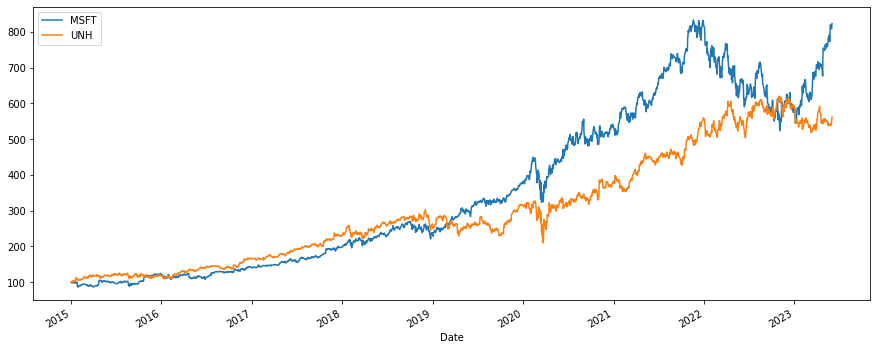

In [3]:
(pf_data / pf_data.iloc[0]*100).plot(figsize=(15,6))

In [4]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean()*250

MSFT    0.248855
UNH     0.203732
dtype: float64

In [5]:
log_returns.cov()*250

,MSFT,UNH
MSFT,0.078790,0.035837
UNH,0.035837,0.069025


In [6]:
log_returns.corr()

,MSFT,UNH
MSFT,1.000000,0.485953
UNH,0.485953,1.000000


In [7]:
num_assets = len(assets)
num_assets

2

In [8]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.36848576, 0.63151424])

Expected Portfolio Return

In [9]:
np.sum(weights * log_returns.mean())*252

0.2221219646503999

Expected Portfolio Variance

In [10]:
np.dot(weights.T, np.dot(log_returns.cov() *252, weights))

0.055344158447200836

In [11]:
print(f"Expected Portfolio Return: {round(np.sum(weights * log_returns.mean())*252*100,2)}%")
print(f"Expected Portfolio Variance: {round(100*np.dot(weights.T, np.dot(log_returns.cov() *252, weights)),2)}%")
print(f"Expected Portfolio Volatility: {round(100*np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))),2)}%")

Expected Portfolio Return: 22.21%
Expected Portfolio Variance: 5.53%
Expected Portfolio Volatility: 23.53%


Expected Portfolio Volatility

In [12]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))

0.23525339199935213

In [13]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    pfolio_returns.append(np.sum(weights*log_returns.mean())*252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [14]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.230112,0.235482
1,0.212946,0.245100
2,0.215064,0.241518
3,0.230754,0.236008
4,0.249082,0.274906


Text(0, 0.5, 'Expected Return')

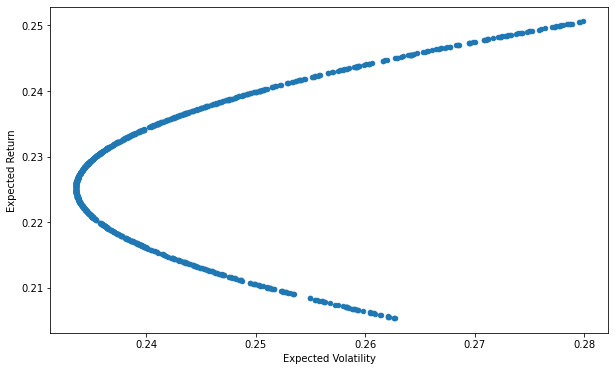

In [15]:
portfolios.plot(x='Volatility',y='Return', kind='scatter', figsize=(10,6))
#plt.axis([0,])
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')